In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.colors import ListedColormap

# Loading Data

In [ ]:
file = pd.read_csv('{}/Social_Network_Ads.csv'.format(os.getcwd()))

In [ ]:
file.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
file.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = file['Gender']
values = array(data)

In [ ]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
# print(integer_encoded)

In [ ]:
file['Gender'] = integer_encoded

In [ ]:
file

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [ ]:
file.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [ ]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Gender,400.0,4.900000e-01,0.500526,0.0,0.00,0.0,1.0,1.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [ ]:
file['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
X = file.iloc[:, [2,3]].values
Y = file.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Linear Kernel

In [ ]:
# Fitting the classifier into the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, C = .1)
classifier.fit(X_Train, Y_Train)


SVC(C=0.1, kernel='linear', random_state=0)

In [ ]:
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_Pred,Y_Test) * 100)

89.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

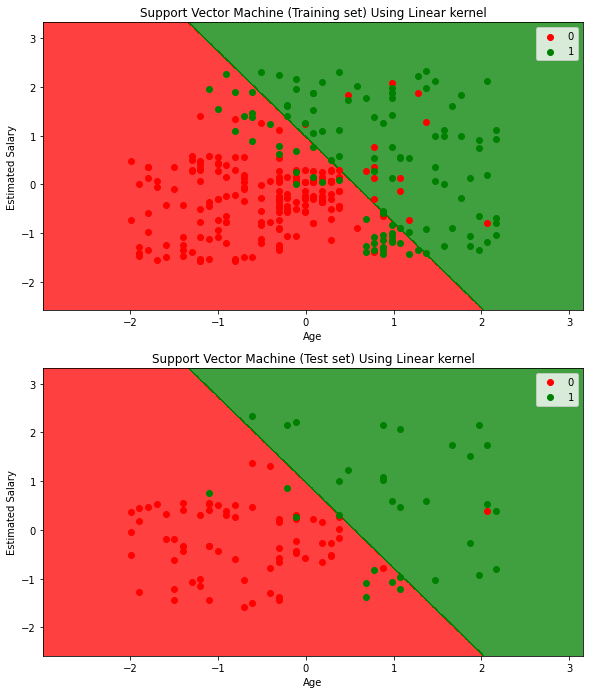

In [ ]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_axes([0.0, 0.6, 0.50, 0.5])
ax2 = fig.add_axes([0.0, 0.0, 0.50, 0.5])
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    ax1.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    ax2.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

ax1.set_title('Support Vector Machine (Training set) Using Linear kernel')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax2.set_title('Support Vector Machine (Test set) Using Linear kernel')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary') 

ax1.legend()
ax2.legend()
plt.show()


# Polynomial Kernel

In [ ]:
# Fitting the classifier into the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', degree=2, random_state = 0)
classifier.fit(X_Train, Y_Train)


SVC(degree=2, kernel='poly', random_state=0)

In [ ]:
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

In [ ]:
print(accuracy_score(Y_Pred,Y_Test) * 100)

74.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

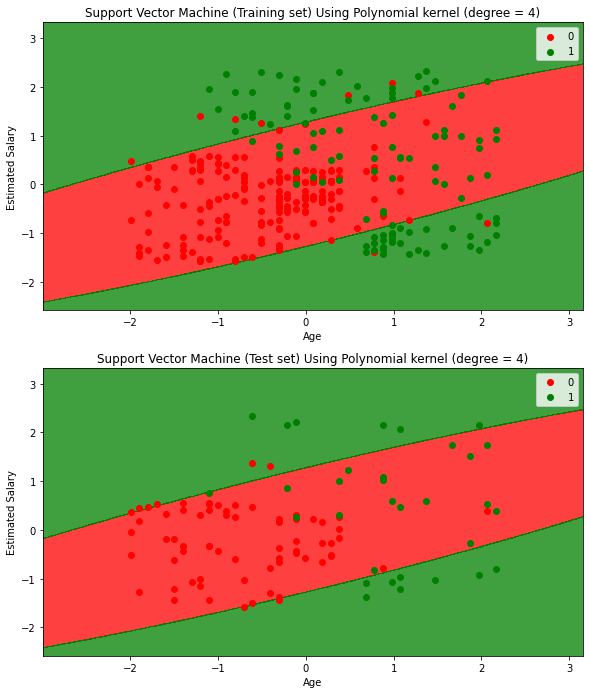

In [ ]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_axes([0.0, 0.6, 0.50, 0.5])
ax2 = fig.add_axes([0.0, 0.0, 0.50, 0.5])
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    ax1.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    ax2.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

ax1.set_title('Support Vector Machine (Training set) Using Polynomial kernel (degree = 4)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax2.set_title('Support Vector Machine (Test set) Using Polynomial kernel (degree = 4)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary') 

ax1.legend()
ax2.legend()
plt.show()


# RBF

In [ ]:
# Fitting the classifier into the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma=0.01)
classifier.fit(X_Train, Y_Train)


SVC(gamma=0.01, random_state=0)

In [ ]:
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

In [ ]:
print(accuracy_score(Y_Pred,Y_Test) * 100)

89.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

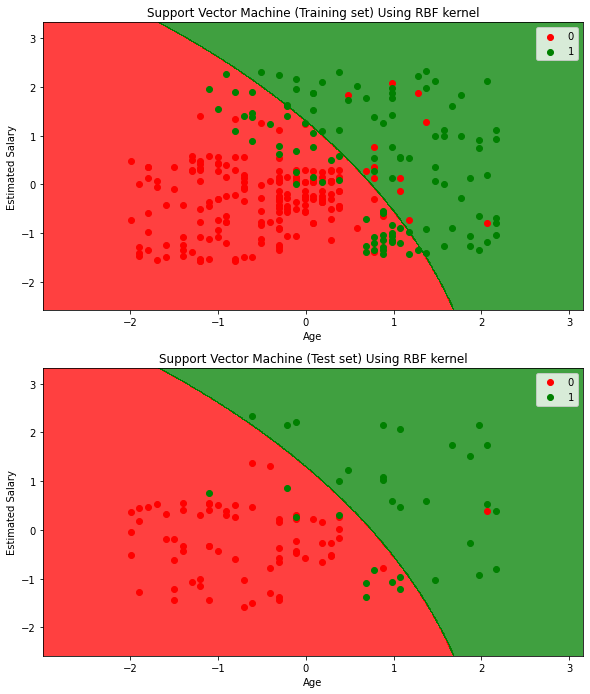

In [ ]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_axes([0.0, 0.6, 0.50, 0.5])
ax2 = fig.add_axes([0.0, 0.0, 0.50, 0.5])
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    ax1.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    ax2.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

ax1.set_title('Support Vector Machine (Training set) Using RBF kernel')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax2.set_title('Support Vector Machine (Test set) Using RBF kernel')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary') 

ax1.legend()
ax2.legend()
plt.show()


# Sigmoid

In [ ]:
# Fitting the classifier into the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_Train, Y_Train)


SVC(kernel='sigmoid', random_state=0)

In [ ]:
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

In [ ]:
print(accuracy_score(Y_Pred,Y_Test) * 100)

74.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

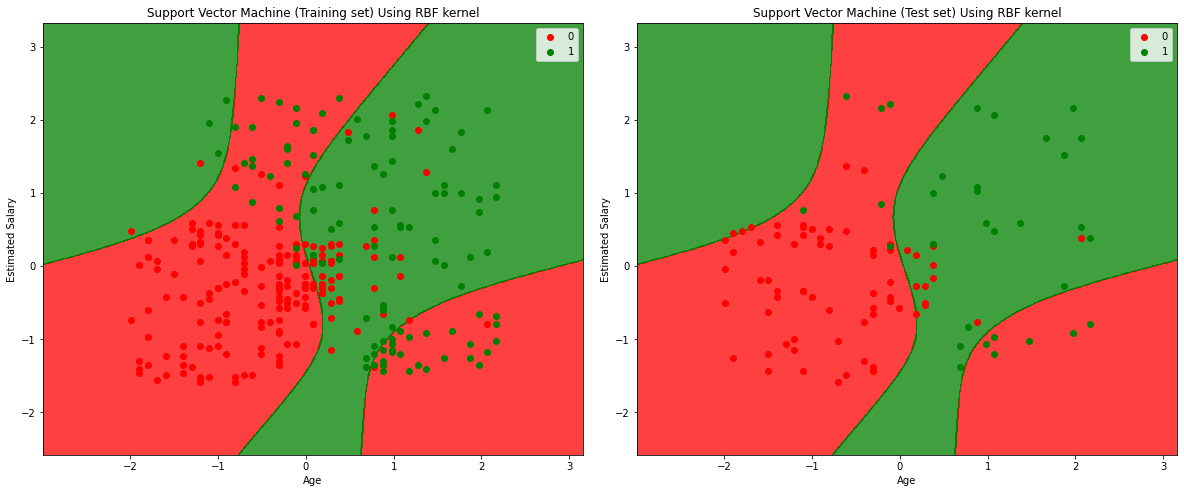

In [ ]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_axes([0.0, 0.0, 0.50, 0.6])
ax2 = fig.add_axes([0.55, 0.0, 0.50, 0.6])
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    ax1.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    ax2.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

ax1.set_title('Support Vector Machine (Training set) Using RBF kernel')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax2.set_title('Support Vector Machine (Test set) Using RBF kernel')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary') 

ax1.legend()
ax2.legend()
plt.show()
